In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 9.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=23f13ca909d19ec62cff8a39377214a66104150cf8544dff785ce0ff20920a75
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Search for any stocks & write it in **stock_name** to predict its values.

https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch

In [ ]:
# Getting stock price data of a particular stock

stock_name = 'AMZN'
data_df = yf.download(stock_name, start="2010-12-31", end="2020-12-31")
data_df.to_csv('data.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-31,181.960007,182.300003,179.509995,180.000000,180.000000,3451900
1,2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
2,2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800
3,2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800
4,2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800
2513,2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2514,2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2515,2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900
2516,2020-12-30,3341.000000,3342.100098,3282.469971,3285.850098,3285.850098,3209300


In [ ]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-12-31,181.960007,182.300003,179.509995,180.000000,180.000000,3451900
1,1,2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
2,2,2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800
3,3,2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800
4,4,2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700


In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,181.960007,182.300003,179.509995,180.000000,3451900
1,1,181.369995,186.000000,181.210007,184.220001,5331400
2,2,186.149994,187.699997,183.779999,185.009995,5031800
3,3,184.100006,187.449997,184.070007,187.419998,3418800
4,4,186.500000,187.410004,185.250000,185.860001,3179700


In [ ]:
df.shape

(2517, 6)

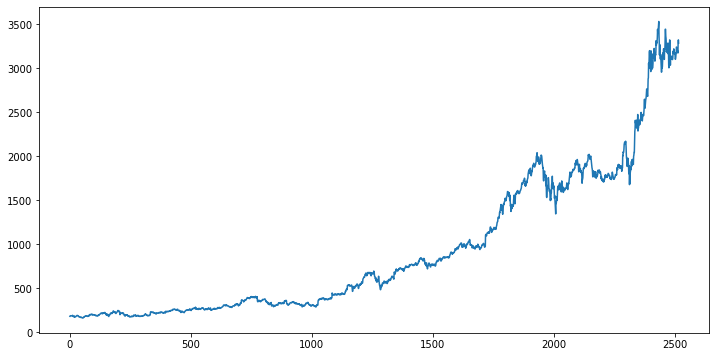

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)

**Moving avg. for 100 days**

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2512    3194.366094
2513    3194.704692
2514    3195.493992
2515    3196.463992
2516    3197.647893
Name: Close, Length: 2517, dtype: float64

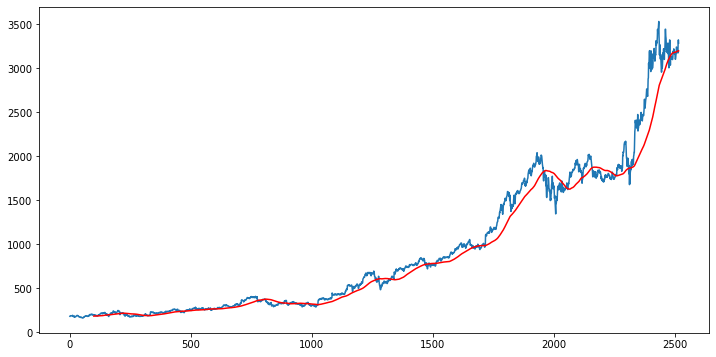

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

**Moving avg of 200 days**

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2512    2839.657048
2513    2847.137448
2514    2854.632247
2515    2862.796497
2516    2870.186548
Name: Close, Length: 2517, dtype: float64

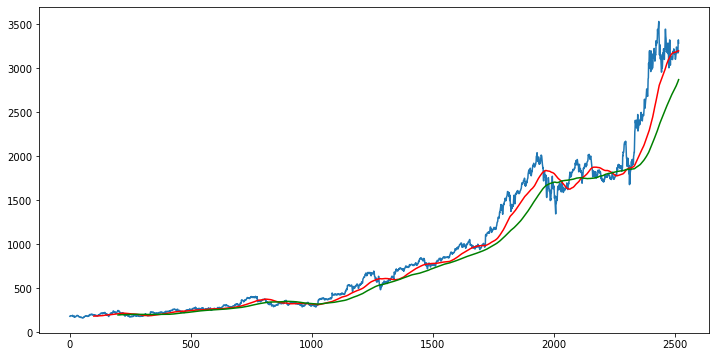

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r', label='MA-100')
plt.plot(ma200,'g', label='')

**Splitting & scaling down of data**

In [ ]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(f'Training data : {data_train.shape}')
print(f'Testing Data : {data_test.shape}')

Training data : (1761, 1)
Testing Data : (756, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[0.01838896],
       [0.02246681],
       [0.02323019],
       ...,
       [0.98157244],
       [0.98688717],
       [0.99059778]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_train_arr.shape[0]):
  x_train.append(data_train_arr[i-100:i])
  y_train.append(data_train_arr[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

**Model creation**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

**Trainning Data**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
52/52 [==============================] - 45s 288ms/step - loss: 0.0633
Epoch 2/20
52/52 [==============================] - 15s 288ms/step - loss: 0.0088
Epoch 3/20
52/52 [==============================] - 15s 287ms/step - loss: 0.0065
Epoch 4/20
52/52 [==============================] - 15s 289ms/step - loss: 0.0071
Epoch 5/20
52/52 [==============================] - 15s 288ms/step - loss: 0.0056
Epoch 6/20
52/52 [==============================] - 15s 283ms/step - loss: 0.0062
Epoch 7/20
52/52 [==============================] - 15s 284ms/step - loss: 0.0055
Epoch 8/20
52/52 [==============================] - 15s 293ms/step - loss: 0.0049
Epoch 9/20
52/52 [==============================] - 15s 287ms/step - loss: 0.0047
Epoch 10/20
52/52 [==============================] - 15s 282ms/step - loss: 0.0053
Epoch 11/20
52/52 [==============================] - 15s 287ms/step - loss: 0.0053
Epoch 12/20
52/52 [==============================] - 15s 283ms/step - loss: 0.0047
Epoch 13/20
5

In [ ]:
data_test.head()

,Close
1761,1169.469971
1762,1189.010010
1763,1204.199951
1764,1209.589966
1765,1229.140015


**Testing Data**

In [ ]:
past_days = data_train.tail(100)

In [ ]:
final_df = past_days.append(data_test, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,989.840027
1,982.010010
2,956.919983
3,967.989990
4,983.299988


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97620579e-02],
       [1.67422082e-02],
       [7.06558709e-03],
       [1.13350232e-02],
       [1.72397218e-02],
       [1.70237442e-02],
       [1.52650626e-02],
       [8.47331390e-03],
       [7.66338018e-03],
       [5.66558134e-03],
       [1.09146496e-02],
       [7.48212376e-03],
       [5.34162669e-03],
       [2.56861532e-03],
       [2.86173285e-03],
       [5.96255939e-03],
       [1.11807669e-02],
       [1.61983919e-02],
       [1.52920627e-02],
       [1.02859958e-02],
       [1.12617438e-02],
       [1.57625761e-02],
       [1.05289736e-02],
       [1.51802251e-02],
       [1.69620464e-02],
       [2.35262358e-02],
       [2.06761081e-02],
       [1.85857272e-02],
       [1.37262191e-02],
       [1.20562354e-02],
       [1.33482642e-02],
       [1.00468786e-02],
       [6.36365395e-03],
       [4.58955378e-04],
       [0.00000000e+00],
       [4.73225202e-03],
       [6.86505158e-03],
       [8.77412894e-03],
       [7.94107914e-03],
       [7.13500595e-03],


In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(f'x-test shape: {x_test.shape}')
print(f'y-test shape: {y_test.shape}')

x-test shape: (756, 100, 1)
y-test shape: (756,)


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[0.07129801],
       [0.07135892],
       [0.07142262],
       [0.0714922 ],
       [0.07157172],
       [0.07167073],
       [0.07180992],
       [0.07201069],
       [0.07228597],
       [0.07266397],
       [0.07321356],
       [0.07400361],
       [0.07508834],
       [0.07645301],
       [0.07806535],
       [0.07988575],
       [0.08189699],
       [0.08409392],
       [0.08649439],
       [0.08908787],
       [0.09185279],
       [0.09480348],
       [0.09796872],
       [0.1013207 ],
       [0.10482226],
       [0.10839761],
       [0.11200613],
       [0.11562257],
       [0.11914055],
       [0.12246698],
       [0.12552042],
       [0.12821151],
       [0.13059068],
       [0.13272965],
       [0.13469295],
       [0.1365511 ],
       [0.13836232],
       [0.14017186],
       [0.1420162 ],
       [0.14393874],
       [0.14595383],
       [0.14805582],
       [0.15021133],
       [0.15238068],
       [0.15454422],
       [0.15669926],
       [0.15884466],
       [0.160

In [ ]:
scale_vl = scaler.scale_
print(f'Scale value : {scale_vl}')

Scale value : [0.00038568]


In [ ]:
scale_factor = 1/scale_vl
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

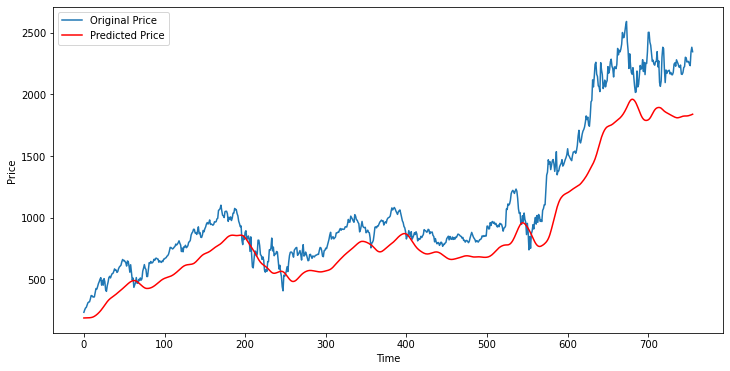

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Original Price')
plt.plot(y_pred,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()